In [328]:
##2023AIML573
#Regression analysis mini project
#Importing the libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

Importing SK learn related libraries

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Read Bag price data from Loacl folder BagDataset.csv

In [331]:
# FILEPATH: /path/to/your/csv/file.csv
BagDf = pd.read_csv('/home/preethi/Work/GITAIML/AIML/regression/BagDataset.csv')

# Display the DataFrame
print(BagDf.head(2))


    Cost  Weight  Weight1  Length  Height   Width
0  242.0    23.2     25.4    30.0   11.52  4.0200
1  290.0    24.0     26.3    31.2   12.48  4.3056


<H1><span style="color: Blue;">1. Analyze the dataset and do EDA</span></H1>

<H3>Start EDA steps to analyze and understand the data</H3>

<span style="color: green;">
Step 1:</span> 
head(),tail(),describe(),shape,info(),value_counts(),groupby(),pivot_table(),corr()

In [332]:
print(BagDf.head(5))

    Cost  Weight  Weight1  Length   Height   Width
0  242.0    23.2     25.4    30.0  11.5200  4.0200
1  290.0    24.0     26.3    31.2  12.4800  4.3056
2  340.0    23.9     26.5    31.1  12.3778  4.6961
3  363.0    26.3     29.0    33.5  12.7300  4.4555
4  430.0    26.5     29.0    34.0  12.4440  5.1340


In [333]:
print(BagDf.tail(5))

     Cost  Weight  Weight1  Length  Height   Width
154  12.2    11.5     12.2    13.4  2.0904  1.3936
155  13.4    11.7     12.4    13.5  2.4300  1.2690
156  12.2    12.1     13.0    13.8  2.2770  1.2558
157  19.7    13.2     14.3    15.2  2.8728  2.0672
158  19.9    13.8     15.0    16.2  2.9322  1.8792


In [334]:
print(BagDf.describe())

              Cost      Weight     Weight1      Length      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [335]:
print(BagDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB
None


Print shape to understand data set size and feature size

In [336]:
print(BagDf.shape)

(159, 6)


#printing not null values count unique values
with this we can get an overview of datavalues and  their distribution

In [337]:
#printing not null values count unique values
value_counts_Cost = BagDf['Cost'].value_counts(dropna=True, sort=True)
value_counts_Weight = BagDf['Weight'].value_counts(dropna=True, sort=True)
value_counts_Weight1 = BagDf['Weight1'].value_counts(dropna=True, sort=True)
value_counts_Length = BagDf['Length'].value_counts(dropna=True, sort=True)
value_counts_Height = BagDf['Height'].value_counts(dropna=True, sort=True)
value_counts_Width = BagDf['Width'].value_counts(dropna=True, sort=True)
print("Cost \n {}  weight \n{}   Weight1\n{}  Length\n{}  Height\n{}  Width\n{}".format(value_counts_Cost,value_counts_Weight,value_counts_Weight1,value_counts_Length,value_counts_Height,value_counts_Width))


Cost 
 Cost
300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: count, Length: 101, dtype: int64  weight 
Weight
19.0    6
20.0    5
22.0    4
20.5    4
25.4    3
       ..
33.7    1
25.6    1
24.1    1
22.1    1
13.2    1
Name: count, Length: 116, dtype: int64   Weight1
Weight1
22.0    7
35.0    6
22.5    5
40.0    5
21.0    4
       ..
19.6    1
21.3    1
22.7    1
24.6    1
14.3    1
Name: count, Length: 93, dtype: int64  Length
Length
23.5    5
25.0    3
22.5    3
34.0    3
45.5    3
       ..
27.9    1
26.8    1
26.7    1
27.2    1
15.2    1
Name: count, Length: 124, dtype: int64  Height
Height
11.1366    2
5.6925     2
2.2139     2
6.1100     2
9.6000     2
          ..
8.8768     1
8.5680     1
9.4850     1
8.3804     1
2.9322     1
Name: count, Length: 154, dtype: int64  Width
Width
3.5250    3
1.1484    2
4.3350    2
4.1440    2
6.1440    2
         ..
3.9060    1
4.4968    1
4.7736    1
5.35

There is <span style="color: red;">no categorical variable hence group by  & pivot_table might not give relevant insights</span>

In [338]:
print( BagDf.groupby(['Cost']).first())

        Weight  Weight1  Length   Height   Width
Cost                                            
0.0       19.0     20.5    22.8   6.4752  3.3516
5.9        7.5      8.4     8.8   2.1120  1.4080
6.7        9.3      9.8    10.8   1.7388  1.0476
7.0       10.1     10.6    11.6   1.7284  1.1484
7.5       10.0     10.5    11.6   1.9720  1.1600
...        ...      ...     ...      ...     ...
1100.0    39.0     42.0    44.6  12.8002  6.8684
1250.0    52.0     56.0    59.7  10.6863  6.9849
1550.0    56.0     60.0    64.0   9.6000  6.1440
1600.0    56.0     60.0    64.0   9.6000  6.1440
1650.0    59.0     63.4    68.0  10.8120  7.4800

[101 rows x 5 columns]


Get the correlation matrix

In [339]:
correlation_matrix = BagDf.corr().round(2)
print(correlation_matrix)

         Cost  Weight  Weight1  Length  Height  Width
Cost     1.00    0.92     0.92    0.92    0.72   0.89
Weight   0.92    1.00     1.00    0.99    0.63   0.87
Weight1  0.92    1.00     1.00    0.99    0.64   0.87
Length   0.92    0.99     0.99    1.00    0.70   0.88
Height   0.72    0.63     0.64    0.70    1.00   0.79
Width    0.89    0.87     0.87    0.88    0.79   1.00


<span style="color: green;">From the correlation matrix we see the following insights</span>
1. Cost of the bag is highly positively correlated to  weight,weight1,length,Heihgt,width   >0.7
2. Weight1 & length are highly correlated to Weight(1,0.99). so instead of using mutiple feature they can be combined and single feature weight cab ebe used

<span style="color: red;">3. After dropping features weight1,length. we will have following feature weight,height,width</span>

# Count the number of missing values in each column of the DataFrame

In [340]:
null_counts = BagDf.isnull().sum() 
print(null_counts)

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64


This a clean data set with <span style="color: green;">no null value.</span> so techiniques like imputing,row,column drop are not needed.
dropna(),fillna(),replace(),duplicated(),drop_duplicates(),astype(), str.strip(),str.lower(), rename(),merge()  are not used as data is clean

<h3>NO data cleaning activity is needed so not performed</h3>

<H1><span style="color: blue;">2. Plotting of various graphs & correlations </span></H1>

<H3>step 1:</H3>
Cost distribution via histogram

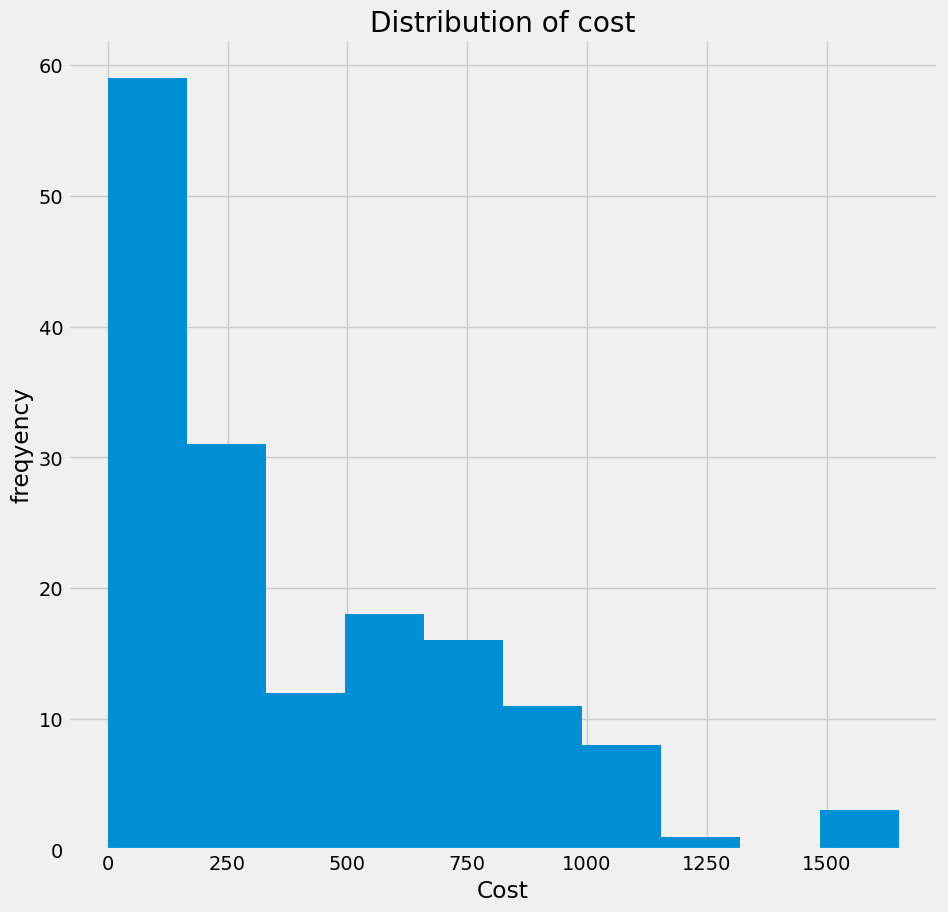

In [341]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.hist(data=BagDf, x='Cost', bins=10)
plt.xlabel('Cost')
plt.ylabel('freqyency')
plt.title('Distribution of cost')
plt.show()


Cost is distributed half normal distribution with peak binned between 0-250 INR. 1500-1750 is an outlier in terms of frequency distribution

<H3>step2 :</H3>
Heat map for correlation matrix

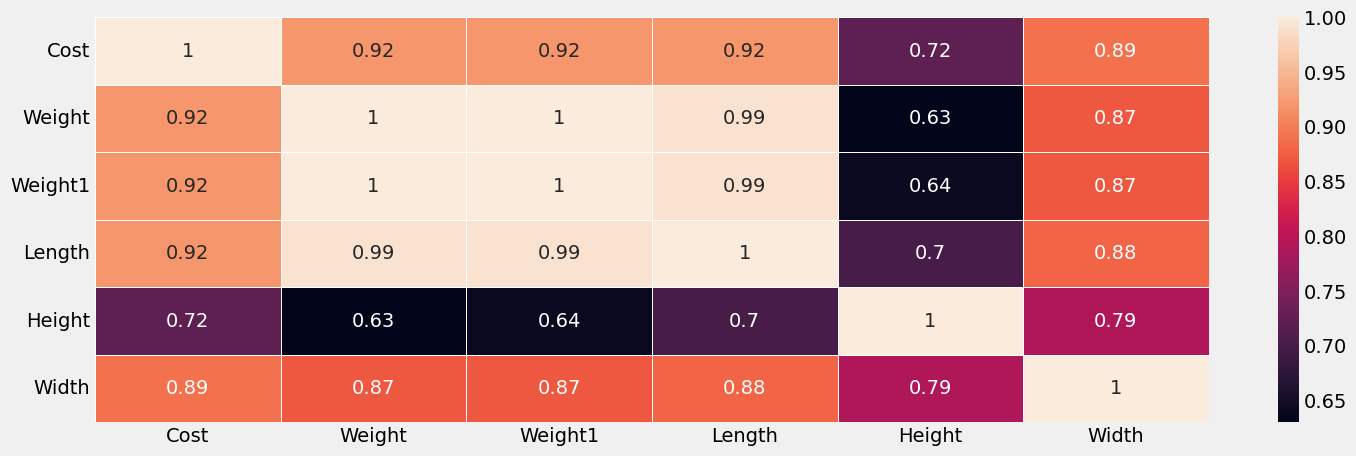

In [342]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(data=correlation_matrix, annot=True,linewidths=.5)
plt.show()

As observed cost has postive correlation to all features
Weight1 & Length Has >0.99 correlation to weight so can be dropped during model prediction


<H3> step3</H3>
Scatter plot for trend analysis

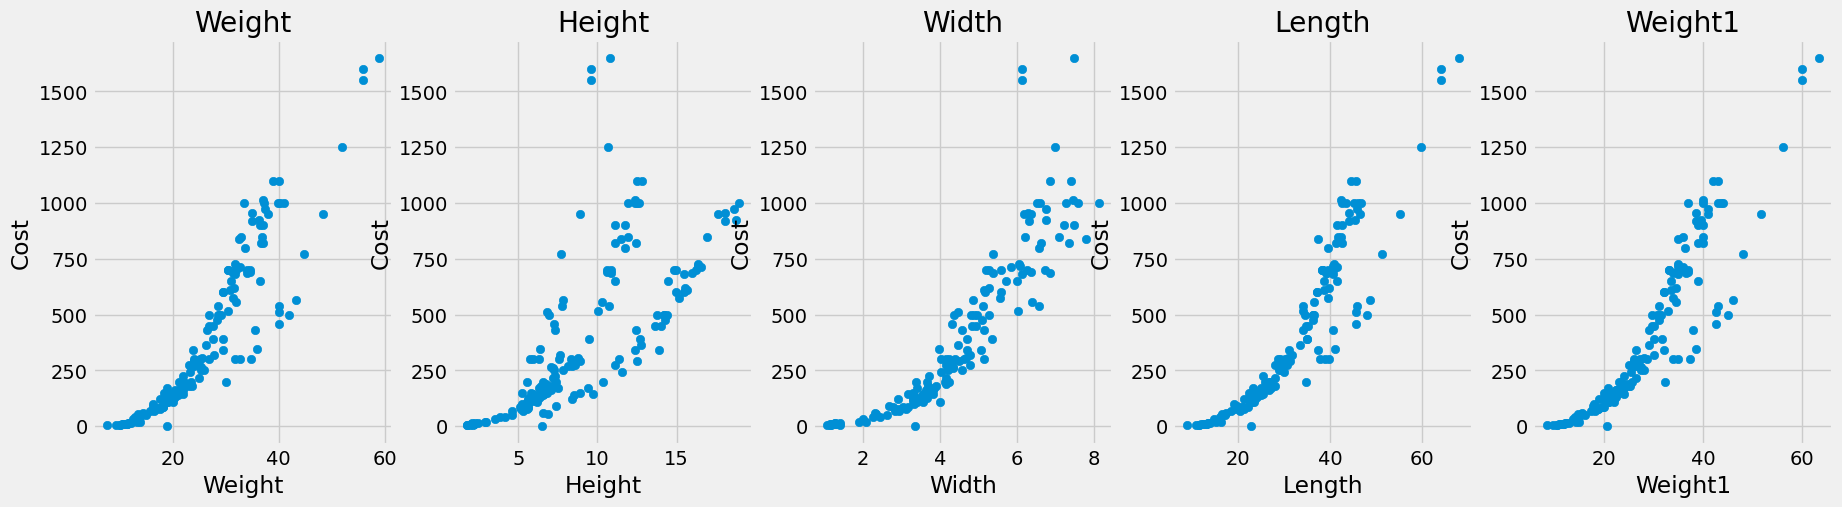

In [343]:
#scatter plot fortrend analysis
plt.figure(figsize=(20, 5))

features = ['Weight', 'Height', 'Width', 'Length', 'Weight1']
target = BagDf['Cost']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = BagDf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Cost')

<H1><span style="color: blue;">3. Model Building using Multiple Linear Regression </span></H1>

<h3>Step 1:</h3>
Data split and columns drop

In [344]:
X=BagDf.drop(['Cost','Weight1','Length'], axis=1) 
#Cost is the target variable, Weight1 and Length are dropped as they are highly correlated with Weight and Height respectively

In [345]:
Y=BagDf['Cost']

In [361]:
 # Normalize our features
X = (abs(X - X.mean())) / X.std()
print(X.head(5))
# Add a 1 column to the start to allow vectorized gradient descent
#X = np.c_[np.ones(X.shape[0]), X] 

     Weight    Height     Width
0  0.863302  0.455455  0.971810
1  1.000307  0.039539  1.260189
2  0.983182  0.083817  1.091838
3  1.376101  0.068772  1.334779
4  1.341850  0.055136  0.649677


Use train_test_split to set test & train dat

In [347]:
#data split as 80:10; as training data set size is small .
#there will likely be overfitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(143, 3) (143,)
(16, 3) (16,)


1. Normal SKlearn library linear regression

In [348]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

cdf = pd.DataFrame(lin_model.coef_, X.columns, columns=['Coefficients'])
print(lin_model.coef_)
print(cdf)
print("Intercept: ", lin_model.intercept_)


[102.77768551   5.86608665  65.05973947]
        Coefficients
Weight    102.777686
Height      5.866087
Width      65.059739
Intercept:  248.68747077451926


In [349]:
def evaluation_metrics(X_train, Y_train,X_test,Y_test,lin_model):
    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = root_mean_squared_error(Y_train, y_train_predict)
    mse= mean_squared_error(Y_train, y_train_predict)
    r2 = r2_score(Y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print('MSE score is {}'.format(mse))
    print("\n")

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print('MSE score is {}'.format(mse))
    return

plotting evaluation graph

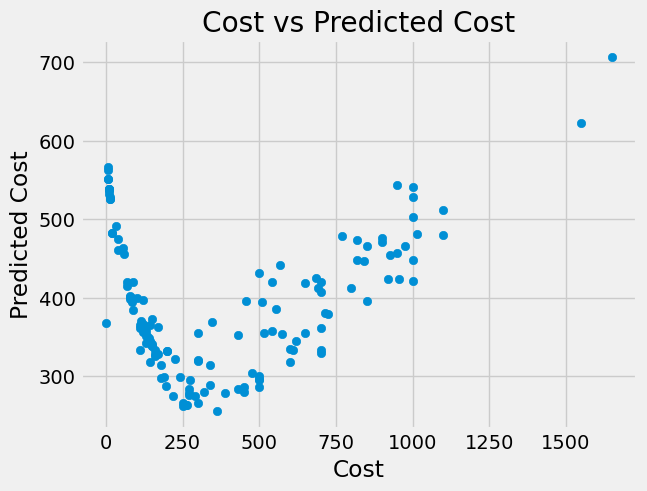

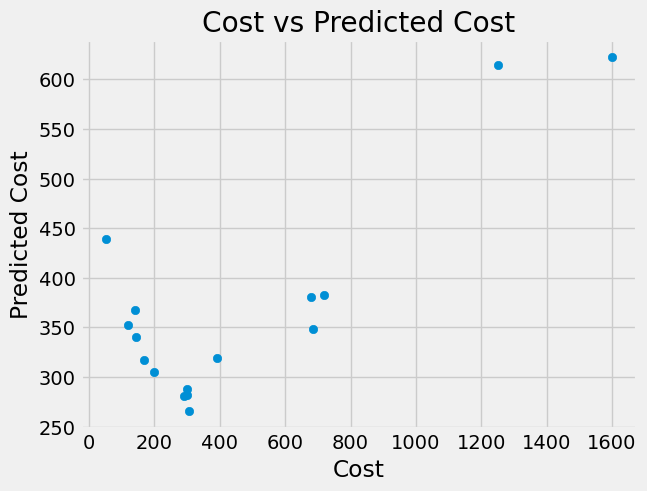

In [350]:
def eval_visualization(X_train, Y_train,X_test,Y_test,lin_model):
    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    plt.scatter(Y_train, y_train_predict)
    plt.xlabel("Cost")
    plt.ylabel("Predicted Cost")
    plt.title("Cost vs Predicted Cost")
    plt.show()

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    plt.scatter(Y_test, y_test_predict)
    plt.xlabel("Cost")
    plt.ylabel("Predicted Cost")
    plt.title("Cost vs Predicted Cost")
    plt.show()
    return
eval_visualization(X_train, Y_train,X_test,Y_test,lin_model)

<H1>
Calculating the R squared, RMSE, and MSE for the model
</H1>

In [351]:
evaluation_metrics(X_train, Y_train,X_test,Y_test,lin_model)

The model performance for training set
--------------------------------------
RMSE is 336.9079001579207
R2 score is 0.06426362831859711
MSE score is 113506.93318881947


The model performance for testing set
--------------------------------------
RMSE is 354.47965415181
R2 score is 0.2909333319811861
MSE score is 113506.93318881947


2. Gradient Descent

In [352]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

In [353]:
def gradient_descent(X, y, theta, alpha=0.01,iters=10):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

In [354]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

With initial theta values of [0. 0. 0.], cost error is 143003.22141509436


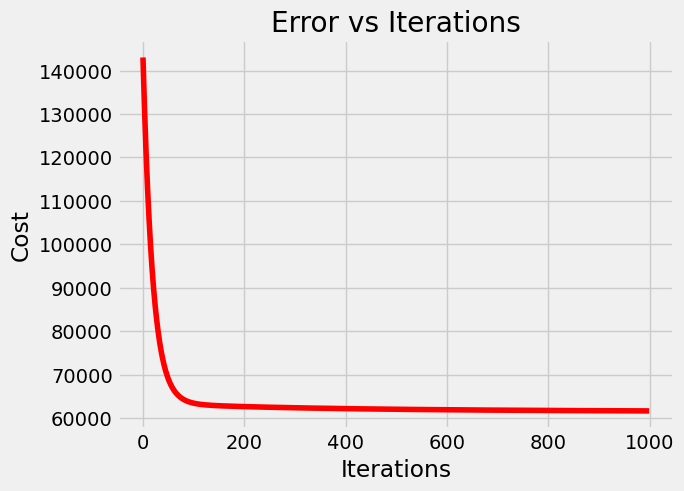

With final theta values of [240.6330737  118.1647755   72.00338021], cost error is 61667.42363451262


In [355]:
def GDmain():    
    # Set hyperparameters
    alpha = 0.01
    iterations = 1000

    # Initialize Theta Values to 0
    theta = np.zeros(X.shape[1])
    initial_cost, _ = cost_function(X, Y, theta)

    print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

    # Run Gradient Descent
    theta, cost_num = gradient_descent(X, Y, theta, alpha, iterations)

    # Display cost chart
    plotChart(iterations, cost_num)

    final_cost, _ = cost_function(X, Y, theta)

    print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))
GDmain()

3.SGD

In [356]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = y.size
    cost_array = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X.to_numpy()[rand_ind,:].reshape(1,X.shape[1])
            y_i = y.to_numpy()[rand_ind].reshape(1,1) 
                    
            cost_temp, error = cost_function(X_i, y_i, theta)            
            theta = theta - (learning_rate * (1/m) * np.dot(X_i.T, error))
            
            cost +=cost_temp[0][0]
        cost_array[it]  = cost
        
    return theta, cost_array




In [372]:
def SGDmain():    
    # Set hyperparameters
    alpha = 0.01
    iterations = 1000

    # Initialize Theta Values to 0
    theta = np.zeros(X.shape[1])
    initial_cost, _ = cost_function(X, y, theta)

    print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

    # Run Stocashtic Gradient Descent
    theta, cost_num = stocashtic_gradient_descent(X, Y, theta, alpha, iterations)

    
    final_cost, _ = cost_function(X, Y, theta)

    print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))
SGDmain()

With initial theta values of [0. 0. 0.], cost error is 143003.22141509436
With final theta values of [212.20693548 178.07806974  64.10409841], cost error is 58688.72915504843


4. Mini Batch

In [358]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [373]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X.to_numpy()
        X=X[indices]
        y= y.to_numpy()
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
            #print("X_i",X_i.shape)
            #print("theta",theta.shape)
            prediction = np.dot(X_i,theta)
            prediction = prediction.reshape(prediction.shape[0],1)
            #print("prediction",prediction.shape)
            #print("y_i",y_i.shape)
            y_i = y_i.reshape(y_i.shape[0],1)   
            temp2= prediction-y_i
            temp =X_i.T.dot((prediction - y_i))
            #print("temp",temp.shape)
            theta = theta -(1/m)*learning_rate*( temp)
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [377]:
def MinibatchGDmain():    
    # Set hyperparameters
    alpha = 0.01
    iterations = 1000

    # Initialize Theta Values to 0
    theta = np.zeros(X.shape[1])
    initial_cost, _ = cost_function(X, y, theta)

    print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

    # Run Stocashtic Gradient Descent
    theta, cost_num = stocashtic_gradient_descent(X, Y, theta, alpha, iterations)

    
    final_cost, _ = cost_function(X, Y, theta)

    print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))
MinibatchGDmain()

With initial theta values of [0. 0. 0.], cost error is 143003.22141509436
With final theta values of [212.20693548 178.07806974  64.10409841], cost error is 58688.72915504843
